# FIT5196 Task 4 in Assessment 2
#### Student Name: Yicheng Zhang
#### Student ID: 27699641

Date: 20/03/2018

Version: 1.0

Environment: Python 3.6.5 and Jupyter notebook

Libraries used:
Libraries used:
* pandas (for dataframe, included in Anaconda Python 3.6) 
* sys (for system information,included in Anaconda Python 3.6)
* matplotlib(for visualization, included in Anaconda Python 3.6)
* seaborn(for visualization, inherit from matplotlib)

## 1.  Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load Data with Pandas

### 2.1. Load CSV File
First step of this assessment is loading the csv file's data from the file, In python,one of the optimized method is using the `pandas` build-in method named `read_csv()`
We can get the data with `dataframe` type.

In [2]:
dataset4 = pd.read_csv('dataset4_with_outliers.csv')

In [3]:
print (dataset4.shape)

(9996, 19)


There are total 9996 records in this dataset, and 19 columns.

### 2.2. Check Data information
Check the information of dataframe

In [4]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 19 columns):
id               9996 non-null int64
date             9996 non-null object
price            9996 non-null float64
bedrooms         9996 non-null int64
bathrooms        9996 non-null float64
sqft_living      9996 non-null int64
sqft_lot         9996 non-null int64
floors           9996 non-null float64
waterfront       9996 non-null int64
view             9996 non-null int64
condition        9996 non-null int64
grade            9996 non-null int64
sqft_above       9996 non-null int64
sqft_basement    9996 non-null int64
yr_built         9996 non-null int64
yr_renovated     9996 non-null int64
zipcode          9996 non-null int64
lat              9996 non-null float64
long             9996 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.4+ MB


In [5]:
dataset4.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


Using the boxplot to detect which column may exist outliers.(Id should not be cnosidered because this column is not necessary when process data.)

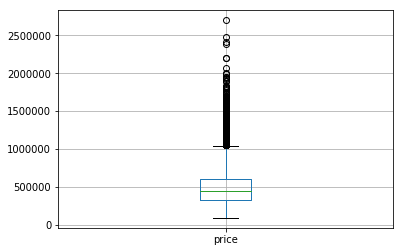

In [6]:
dataset4.boxplot(column=['price'])

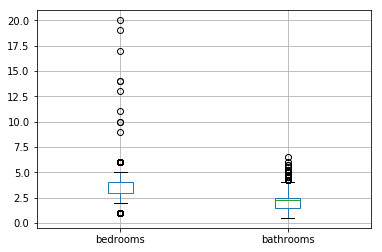

In [7]:
dataset4.boxplot(column=['bedrooms','bathrooms'])

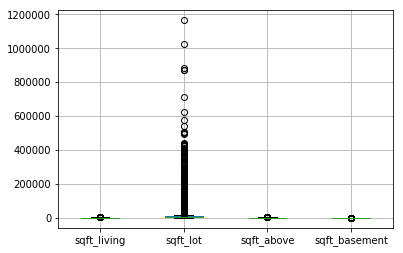

In [8]:
dataset4.boxplot(column=['sqft_living','sqft_lot','sqft_above','sqft_basement'])

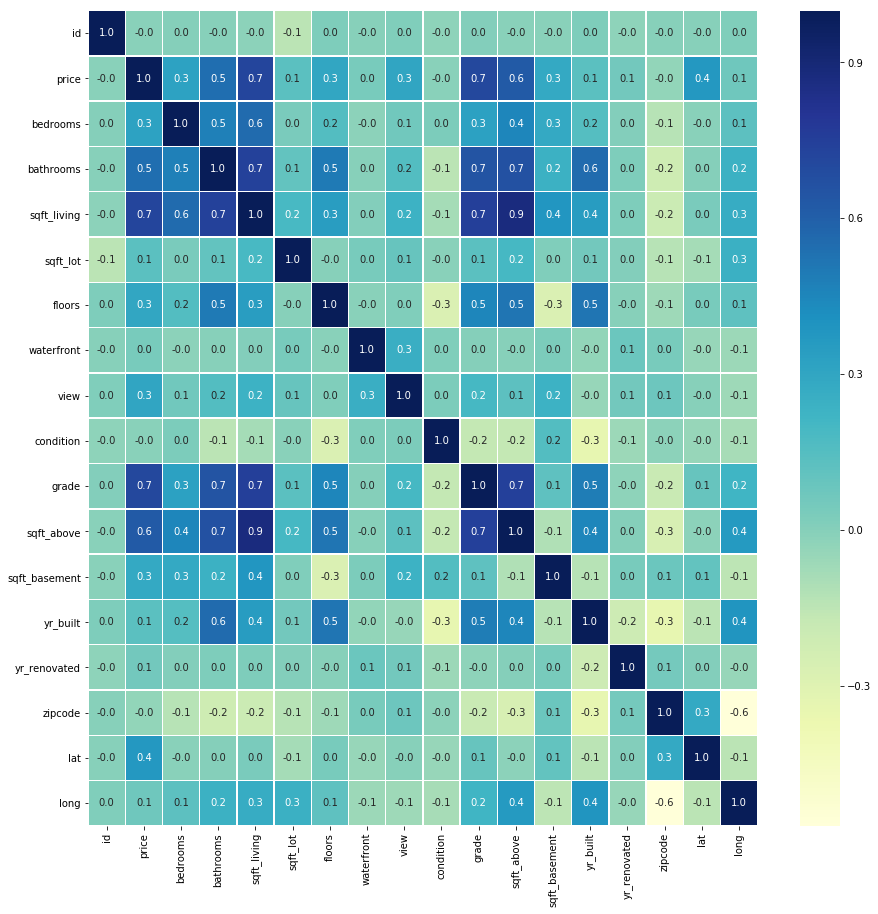

In [9]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(dataset4.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlGnBu")

From the above observing, we can find those columns may have outliers.
- - -
`Price`: The price may be too high or too low for property.
- - -
`bedrooms`: The number of bedrooms may be too high, it should be checked later.
- - -
`bathrooms`: same situation with bedrooms
- - -
`square feet of property`: the area should be checked later.
- - -
for other columns:

`Id`,`waterfront`,`view`,`condition`,`yr_renovated`,`zipcode`,`lat`,`long`: These columns have no strong correlation with other columns, and the value of these columns is normal.

`grade`,`yr_built`,`floors`: these columns should be used as kind of reference, which can verify other outliers.


## 3.Try to detect outliers

### 3.1. Check the Price

First, we can create another column to caculate average price for each inner living space, this price may not be correct, consider there are some properties are farm, or other location with large land space area, the price of these location should be influenced by land space instead of inner living space. We can use this as a reference indicator."

In [10]:
dataset4['avg_price'] = (dataset4['price'])/(dataset4['sqft_living'])

In [11]:
dataset4.avg_price.describe()

count    9996.000000
mean      255.211128
std        92.784628
min        89.204658
25%       181.776860
50%       241.341829
75%       309.048237
max       968.058861
Name: avg_price, dtype: float64

We can use the scatter plot to find the relationship between two columns, find some outliers.

According to the relationship heatmap, we can check `Price` and `sqft_living`,`bathrooms` & `grade`

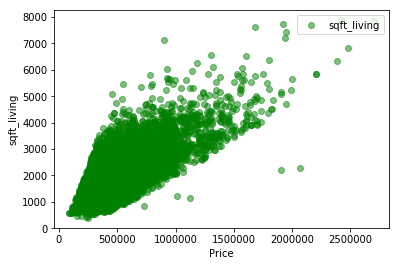

In [12]:
plt.scatter(dataset4['price'],dataset4.sqft_living,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("sqft_living")
plt.legend(loc=1)
plt.show()

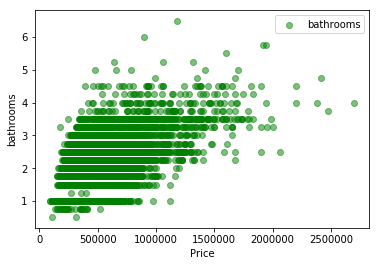

In [13]:
plt.scatter(dataset4['price'],dataset4.bathrooms,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("bathrooms")
plt.legend(loc=1)
plt.show()

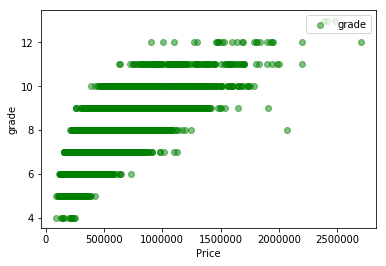

In [14]:
plt.scatter(dataset4['price'],dataset4.grade,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("grade")
plt.legend(loc=1)
plt.show()

It can be found that there exist some outliers (outside the bond of major distribution area)
- - -
We can use a pandas buildin method named `groupby()` to use `grade` as group(there is a few number of grade levels), the reason is `grade` has connection with many other columns, it can be used as a important indecator for other columns.

In [15]:
group1 = dataset4.groupby('grade')
stastic1 = group1.price.describe()
group1.price.describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
4,12.0,1.869208e+05,51746.872801,90000.0,148250.0,202500.0,229287.5,2.480000e+05
5,107.0,2.339842e+05,70884.062221,89950.0,185450.0,225000.0,284000.0,4.250000e+05
6,965.0,2.967699e+05,100621.990862,118000.0,217000.0,275500.0,364000.0,7.306070e+05
7,4345.0,3.984489e+05,138672.806644,155000.0,289950.0,375000.0,480000.0,1.122948e+06
8,2807.0,5.237834e+05,173372.971175,205000.0,386250.0,505500.0,625500.0,2.066243e+06
9,1139.0,7.233687e+05,236174.261153,256950.0,555000.0,700000.0,856000.0,1.903987e+06
10,457.0,9.320359e+05,281875.149620,389000.0,740000.0,864000.0,1088000.0,1.789950e+06
11,136.0,1.214719e+06,316891.609983,633000.0,968750.0,1157500.0,1406250.0,2.200000e+06
12,25.0,1.638176e+06,383370.531621,900000.0,1465000.0,1637500.0,1835000.0,2.700000e+06


There are many rules to detect outliers, in this task, we cannot ensure the data distribute as Gaussian distribution, the $3\sigma$ rules may be not very suitable, in this case, we can apply another rule named [IQR](https://en.wikipedia.org/wiki/Interquartile_range):
> Assume we have a set of data, the IQR should be the difference between 75th and 25th percentiles of data.

We can make a assumption that the following condition:
$$\text{Upper bond: }Q_3+(Q_3-Q_1)*1.5$$
$$\text{Lower bond: }Q_1-(Q_3-Q_1)*1.5$$
$$Q_3 \text{ is 75th percentiles, }Q_1 \text{ is 25th percentiles}$$
In the above condition, we can say, the data outside the bond may be outlier.

**Check the price based on grade,find out possible outliers**

In [16]:
dataset4[(dataset4.price > (stastic1.loc[5]['75%']+(stastic1.loc[5]['75%']-stastic1.loc[5]['25%'])*1.5))&(dataset4.grade == 5)\
        | (dataset4.price < (stastic1.loc[5]['25%']-(stastic1.loc[5]['75%']-stastic1.loc[5]['25%'])*1.5))&(dataset4.grade == 5)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price


In [17]:
error1 = dataset4[(dataset4.price > (stastic1.loc[6]['75%']+(stastic1.loc[6]['75%']-stastic1.loc[6]['25%'])*1.5))&(dataset4.grade == 6)\
        | (dataset4.price < (stastic1.loc[6]['25%']-(stastic1.loc[6]['75%']-stastic1.loc[6]['25%'])*1.5))&(dataset4.grade == 6)]

In [18]:
error1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
8,7200179,20141016T000000,730607.043194,2,1.0,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,869.770290
69,3026079005,20141017T000000,640000.000000,6,2.0,2840,228690,1.5,0,0,3,6,2720,120,1948,0,98019,47.7158,-121.966,225.352113
2651,8651400230,20141208T000000,642063.557247,3,2.0,1100,5200,1.0,0,0,3,6,1100,0,1969,2014,98042,47.3606,-122.083,583.694143
5768,3886903155,20150304T000000,606000.000000,3,2.0,1980,7680,1.5,0,0,4,6,1070,910,1911,0,98033,47.6839,-122.195,306.060606
8002,2629600016,20150410T000000,625500.000000,2,1.0,2160,7439,1.0,0,0,4,6,1300,860,1953,0,98115,47.6981,-122.286,289.583333


If we have the potential outliers numbers is small, we can assume all of this are outliers, if the number of potential outliers is big, we should double check the result incase dropping extra data.

For the grade 6, there is a intersting record locate at 69, the `sqft_lot` is about **228690** approximate about **20000$m^2$**, however, the price for that large land space is relatively low, we should check the record with large landspace with low price, these data may be outliers.

**Check the data with large landspace**

In [19]:
print(dataset4[dataset4.sqft_lot>100000].sqft_lot.describe())
print(dataset4[dataset4.sqft_lot>100000].price.describe())

count    2.400000e+02
mean     2.347820e+05
std      1.502855e+05
min      1.001880e+05
25%      1.390652e+05
50%      2.108300e+05
75%      2.565678e+05
max      1.164794e+06
Name: sqft_lot, dtype: float64
count    2.400000e+02
mean     6.732995e+05
std      3.514852e+05
min      1.500000e+05
25%      4.315000e+05
50%      5.850000e+05
75%      7.756750e+05
max      1.950000e+06
Name: price, dtype: float64


According to the `describe()`, we can check the land space larger than 75th percentiles but the price less than 500,000 (much lower than 50th percentiles.)

In [20]:
dataset4[(dataset4.sqft_lot>250000)&(dataset4.price<500000)] #possible outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
688,826069002,20141029T000000,355000.0,2,1.00,1350,368517,1.0,0,0,3,6,1350,0,1947,0,98077,47.7617,-122.061,262.962963
1903,1220069035,20141120T000000,438950.0,4,2.50,2470,385506,2.0,0,3,3,7,2470,0,1991,0,98022,47.2396,-121.993,177.712551
2069,123079023,20141124T000000,356000.0,2,1.00,1430,365904,1.0,0,0,3,7,1010,420,1991,0,98065,47.5130,-121.857,248.951049
2267,120069003,20141201T000000,495000.0,4,3.00,3620,403693,2.0,0,2,3,9,3620,0,1980,0,98022,47.2527,-121.980,136.740331
2420,3420069055,20141203T000000,350000.0,4,2.25,1570,499571,1.0,0,3,4,7,1570,0,1972,0,98022,47.1808,-122.023,222.929936
3356,3421069044,20141223T000000,390000.0,3,1.75,2092,250905,1.0,0,0,3,7,2092,0,1981,0,98022,47.2664,-122.027,186.424474
3586,722069057,20150102T000000,408000.0,3,1.75,1600,313672,1.0,0,0,4,7,1600,0,1960,0,98058,47.4129,-122.080,255.000000
4953,3220079017,20150213T000000,432000.0,5,2.75,2060,329903,1.5,0,3,5,7,2060,0,1989,0,98022,47.1776,-121.944,209.708738
5027,120059044,20150217T000000,250000.0,3,1.75,1628,286355,1.0,0,0,3,7,1628,0,1996,0,98092,47.2558,-122.122,153.562654
5329,2220069003,20150223T000000,425000.0,3,2.75,1360,542322,1.0,0,2,4,7,1140,220,1955,0,98022,47.2069,-122.024,312.500000


These data above have a high chance of being outliers, because the price for that large area of land space may be too low.
- - -
**Check other grades**

In [21]:
error2 = dataset4[(dataset4.price > (stastic1.loc[7]['75%']+(stastic1.loc[7]['75%']-stastic1.loc[7]['25%'])*1.5))&(dataset4.grade == 7)\
        | (dataset4.price < (stastic1.loc[7]['25%']-(stastic1.loc[7]['75%']-stastic1.loc[7]['25%'])*1.5))&(dataset4.grade == 7)]

In [22]:
len(error2)

64

We can found there are 64 records may be outliers, there is possiblilty that some of those data should not be outliers, we should double check using the histogram.

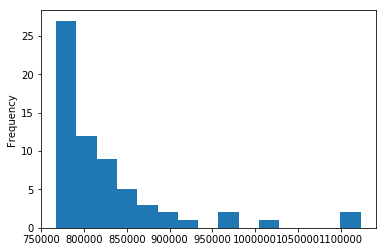

In [23]:
error2.price.plot(kind='hist',bins =15)

It can be found that the price large than 850,000 may be outliers. we can assume these data as outliers.

In [24]:
error2 [error2.price > 850000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
734,1959703070,20141029T000000,9.797000e+05,5,3.00,3730,5500,1.5,0,0,3,7,2160,1570,1927,0,98102,47.6507,-122.320,262.654155
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169,835.730014
1518,5430300120,20141113T000000,1.100000e+06,5,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287,254.629630
2359,7192800145,20141202T000000,9.777699e+05,2,1.00,2100,4480,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372,465.604708
3406,3213200314,20141226T000000,8.740000e+05,4,2.75,2860,6867,1.0,0,1,5,7,1560,1300,1946,0,98115,47.6723,-122.263,305.594406
4859,3052700921,20150211T000000,9.000000e+05,6,3.00,2620,4350,1.0,0,0,3,7,1760,860,1957,0,98117,47.6780,-122.373,343.511450
5029,629000410,20150217T000000,9.150000e+05,3,2.75,2800,9750,1.0,0,0,5,7,1400,1400,1957,0,98004,47.5862,-122.202,326.785714
5072,5272200005,20150218T000000,1.122948e+06,2,1.00,1160,6911,1.0,0,0,3,7,1160,0,1947,0,98125,47.7149,-122.318,968.058861
7055,7237600130,20150326T000000,8.520000e+05,4,1.00,2220,3588,1.5,0,0,4,7,1470,750,1927,0,98115,47.6854,-122.308,383.783784
7521,5078400035,20150402T000000,8.750000e+05,4,1.75,2360,8286,1.0,0,0,3,7,1320,1040,1952,0,98004,47.6226,-122.205,370.762712


In [25]:
error3 = dataset4[(dataset4.price > (stastic1.loc[8]['75%']+(stastic1.loc[8]['75%']-stastic1.loc[8]['25%'])*1.5))&(dataset4.grade == 8)\
        | (dataset4.price < (stastic1.loc[8]['25%']-(stastic1.loc[8]['75%']-stastic1.loc[8]['25%'])*1.5))&(dataset4.grade == 8)]

In [26]:
len(error3)

41

We can found there are 41 records may be outliers, there is possiblilty that some of those data should not be outliers, we should double check using the histogram.

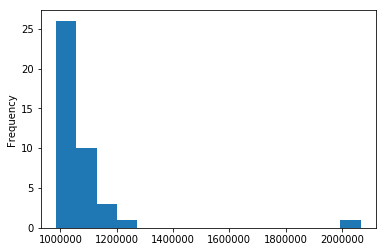

In [27]:
error3.price.plot(kind='hist',bins =15)

It can be found that the price large than 1,100,000 may be outliers. we can assume these data as outliers.

In [28]:
error3 [error3.price > 1100000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
1272,8712100435,20141110T000000,1.197000e+06,4,2.50,3940,4407,2.0,0,0,4,8,2620,1320,1921,0,98112,47.6374,-122.299,303.807107
3101,9273200115,20141217T000000,1.250000e+06,4,2.75,4120,12500,1.0,0,4,4,8,2060,2060,1947,0,98116,47.5914,-122.385,303.398058
4786,2523039054,20150210T000000,1.115000e+06,3,2.50,4530,22873,2.0,0,2,5,8,3220,1310,1912,0,98166,47.4567,-122.369,246.136865
6903,3362401611,20150325T000000,1.165000e+06,4,3.75,3920,4500,3.0,0,0,3,8,3920,0,2013,0,98103,47.6805,-122.346,297.193878
8455,4473400155,20150417T000000,1.137500e+06,4,3.50,3160,4200,2.0,0,4,3,8,2180,980,1999,0,98144,47.5963,-122.292,359.968354
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192,905.056018
8929,9541600295,20150424T000000,1.110000e+06,4,2.50,2990,8640,1.0,0,0,5,8,2100,890,1959,0,98005,47.5932,-122.172,371.237458


In [29]:
error4 = dataset4[(dataset4.price > (stastic1.loc[9]['75%']+(stastic1.loc[9]['75%']-stastic1.loc[9]['25%'])*1.5))&(dataset4.grade == 9)\
        | (dataset4.price < (stastic1.loc[9]['25%']-(stastic1.loc[9]['75%']-stastic1.loc[9]['25%'])*1.5))&(dataset4.grade == 9)]

In [30]:
len(error4)

25

We can found there are 25 records may be outliers, there is possiblilty that some of those data should not be outliers, we should double check using the histogram.

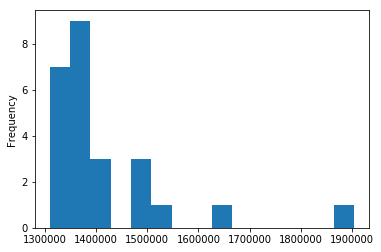

In [31]:
error4.price.plot(kind='hist',bins =15)

It can be found that the price large than 1,400,000 may be outliers. we can assume these data as outliers.

In [32]:
error4 [error4.price > 1400000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
586,7933250050,20141028T000000,1.419000e+06,5,3.25,4020,4500,2.0,0,0,3,9,3120,900,2010,0,98004,47.6349,-122.204,352.985075
1584,8924600020,20141114T000000,1.535000e+06,4,4.50,5770,10050,1.0,0,3,5,9,3160,2610,1949,0,98115,47.6770,-122.275,266.031196
2172,4141800215,20141126T000000,1.495000e+06,4,3.75,3770,4000,2.5,0,0,5,9,2890,880,1916,0,98122,47.6157,-122.287,396.551724
2549,2524049018,20141205T000000,1.406888e+06,5,2.25,3580,16789,2.0,0,0,5,9,3580,0,1966,0,98040,47.5364,-122.239,392.985475
2891,327000050,20141212T000000,1.500000e+06,4,3.25,3860,7199,2.0,0,1,3,9,2870,990,2005,0,98115,47.6855,-122.269,388.601036
3777,9808630120,20150108T000000,1.903987e+06,3,2.50,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203,869.400318
5097,1118001360,20150218T000000,1.475000e+06,3,2.75,3910,7080,1.0,0,0,5,9,1970,1940,1949,0,98112,47.6324,-122.289,377.237852
9463,3024059057,20150501T000000,1.650000e+06,4,4.50,5550,16065,2.0,0,0,3,9,3880,1670,2003,0,98040,47.5455,-122.214,297.297297


For this possible errors have few records, we can assume them as outliers.

In [33]:
error5 = dataset4[((dataset4.price > (stastic1.loc[10]['75%']+(stastic1.loc[10]['75%']-stastic1.loc[10]['25%'])*1.5))\
          &(dataset4.grade == 10))\
        | ((dataset4.price < (stastic1.loc[10]['25%']-(stastic1.loc[10]['75%']-stastic1.loc[10]['25%'])*1.5))\
            &(dataset4.grade == 10))]

In [34]:
len(error5)

11

We can found there are 11 records may be outliers, there is possiblilty that some of those data should not be outliers, we should double check using the histogram.

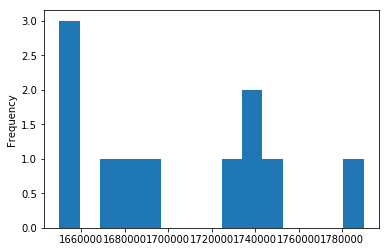

In [35]:
error5.price.plot(kind='hist',bins =15)

It can be found that the price large than 1,660,000 may be outliers. we can assume these data as outliers.

In [36]:
error5 [error5.price > 1660000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
82,1561600056,20141017T000000,1735000.0,4,3.50,4010,9654,2.0,0,0,3,10,4010,0,2007,0,98004,47.5891,-122.200,432.668329
1174,1959701745,20141107T000000,1675000.0,6,2.25,4910,6600,2.5,0,0,5,10,3580,1330,1910,0,98102,47.6458,-122.320,341.140530
1867,5021900140,20141120T000000,1679000.0,5,4.25,4830,11466,2.0,0,0,3,10,3720,1110,2014,0,98040,47.5774,-122.222,347.619048
2188,4094800260,20141126T000000,1730000.0,4,3.50,4440,20668,2.0,0,2,5,10,3240,1200,1965,0,98040,47.5472,-122.235,389.639640
2414,1024049024,20141203T000000,1735000.0,5,3.50,4870,7700,2.5,0,3,5,10,3650,1220,1929,0,98144,47.5832,-122.290,356.262834
4514,715010130,20150202T000000,1750000.0,6,4.25,5860,13928,2.0,0,3,3,10,4150,1710,2013,0,98006,47.5382,-122.114,298.634812
4737,1370800700,20150209T000000,1695000.0,3,4.00,3910,5350,2.0,0,2,5,10,2610,1300,1933,0,98199,47.6393,-122.408,433.503836
5524,3893100462,20150225T000000,1789950.0,5,3.75,4360,8504,2.0,0,4,3,10,3530,830,2014,0,98033,47.6936,-122.190,410.538991


In [37]:
error6 = dataset4[(dataset4.price > (stastic1.loc[11]['75%']+(stastic1.loc[11]['75%']-stastic1.loc[11]['25%'])*1.5))&(dataset4.grade == 11)\
        | (dataset4.price < (stastic1.loc[11]['25%']-(stastic1.loc[11]['75%']-stastic1.loc[11]['25%'])*1.5))&(dataset4.grade == 11)]

In [38]:
len(error6)

1

In [39]:
error7 = dataset4[(dataset4.price > (stastic1.loc[12]['75%']+(stastic1.loc[12]['75%']-stastic1.loc[12]['25%'])*1.5))&(dataset4.grade == 12)\
        | (dataset4.price < (stastic1.loc[12]['25%']-(stastic1.loc[12]['75%']-stastic1.loc[12]['25%'])*1.5))&(dataset4.grade == 12)]

In [40]:
len(error7)

2

In [41]:
possible_outliers = error1.append([error2 [error2.price > 850000],error3 [error3.price > 1100000], error4 [error4.price > 1400000],error5 [error5.price > 1660000],error6,error7])

In [42]:
possible_outliers.append([dataset4[(dataset4.sqft_lot>250000)&(dataset4.price<500000)]])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
8,7200179,20141016T000000,7.306070e+05,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,869.770290
69,3026079005,20141017T000000,6.400000e+05,6,2.00,2840,228690,1.5,0,0,3,6,2720,120,1948,0,98019,47.7158,-121.966,225.352113
2651,8651400230,20141208T000000,6.420636e+05,3,2.00,1100,5200,1.0,0,0,3,6,1100,0,1969,2014,98042,47.3606,-122.083,583.694143
5768,3886903155,20150304T000000,6.060000e+05,3,2.00,1980,7680,1.5,0,0,4,6,1070,910,1911,0,98033,47.6839,-122.195,306.060606
8002,2629600016,20150410T000000,6.255000e+05,2,1.00,2160,7439,1.0,0,0,4,6,1300,860,1953,0,98115,47.6981,-122.286,289.583333
734,1959703070,20141029T000000,9.797000e+05,5,3.00,3730,5500,1.5,0,0,3,7,2160,1570,1927,0,98102,47.6507,-122.320,262.654155
1060,2473381070,20141105T000000,1.011233e+06,3,1.75,1210,7000,1.0,0,0,3,7,1210,0,1975,0,98058,47.4572,-122.169,835.730014
1518,5430300120,20141113T000000,1.100000e+06,5,2.25,4320,7620,2.0,0,0,3,7,2880,1440,1973,2014,98115,47.6824,-122.287,254.629630
2359,7192800145,20141202T000000,9.777699e+05,2,1.00,2100,4480,1.0,0,0,5,7,1400,700,1908,0,98126,47.5740,-122.372,465.604708
3406,3213200314,20141226T000000,8.740000e+05,4,2.75,2860,6867,1.0,0,1,5,7,1560,1300,1946,0,98115,47.6723,-122.263,305.594406


In [43]:
len(possible_outliers)

44

**Try to drop the outliers**

In [44]:
dataset4.drop(possible_outliers.index.tolist(),inplace= True)

**Check the distribution**

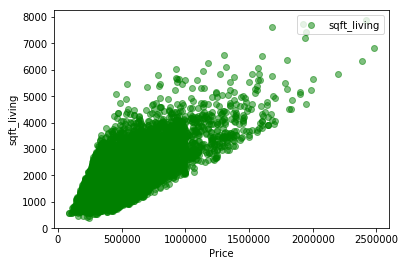

In [45]:
plt.scatter(dataset4['price'],dataset4.sqft_living,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("sqft_living")
plt.legend(loc=1)
plt.show()

### 3.2. Check the bedrooms and bathrooms

**First, we can use scatter plot to find potential outliers**

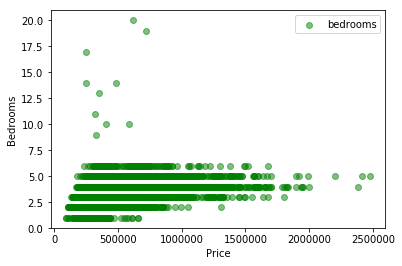

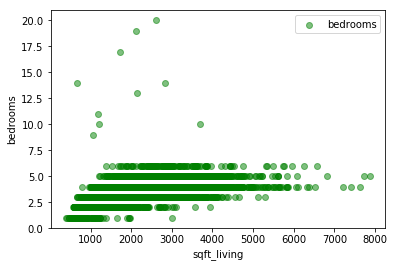

In [46]:
plt.scatter(dataset4['price'],dataset4.bedrooms,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.legend(loc=1)
plt.show()
plt.scatter(dataset4['sqft_living'],dataset4.bedrooms,c="g", alpha=0.5,)
plt.xlabel("sqft_living")
plt.ylabel("bedrooms")
plt.legend(loc=1)
plt.show()

**Group by bedroom numbers, caculate mean living areas**

In [47]:
group2 = dataset4.groupby('bedrooms')
group2['sqft_living'].agg('mean') #group aggreagation

bedrooms
1      907.804878
2     1221.143405
3     1777.542153
4     2494.908915
5     2907.008427
6     3129.565574
9     1060.000000
10    2450.000000
11    1190.000000
13    2130.000000
14    1745.000000
17    1730.000000
19    2120.000000
20    2620.000000
Name: sqft_living, dtype: float64

A problem can be found, when the number of bedrooms inrease to 9, the average square feet even reduce a lot, it is repugant to common sense. However, we should consider the possiblity of special purpose(motel or homestay)

In [48]:
dataset4[dataset4.bedrooms > 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
161,1214000050,20141020T000000,350000.0,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166,47.4593,-122.343,164.319249
457,1951800580,20141024T000000,590000.0,10,2.50,3700,12500,1.0,0,0,5,8,1920,1780,1973,0,98006,47.5403,-122.168,159.459459
2019,3644100073,20141122T000000,245000.0,14,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295,365.671642
2610,2919200280,20141208T000000,720168.0,19,2.25,2120,3794,2.0,0,0,4,7,1420,700,1926,0,98117,47.6893,-122.359,339.701887
2880,7738500475,20141212T000000,485000.0,14,3.25,2820,6611,1.0,0,0,3,7,1410,1410,1958,0,98155,47.7473,-122.285,171.985816
4846,3211101010,20150211T000000,319500.0,11,1.00,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,47.4807,-122.157,268.487395
7290,8682291840,20150331T000000,408000.0,10,2.00,1200,3900,1.0,0,0,3,8,1200,0,2006,0,98053,47.7200,-122.024,340.000000
8004,9441300030,20150410T000000,615000.0,20,1.75,2620,8280,1.0,0,0,4,7,1330,1290,1948,0,98177,47.7235,-122.359,234.732824
9655,739820050,20150505T000000,250000.0,17,2.50,1730,7200,2.0,0,0,4,7,1730,0,1985,0,98031,47.4029,-122.196,144.508671
9774,3438500168,20150507T000000,325000.0,9,1.50,1060,7488,1.0,0,0,5,7,1060,0,1977,0,98106,47.5549,-122.356,306.603774


The data above seems to be conflict with assumption(The bathrooms number is too low), we should drop these outliers.

**Try to drop the bedrooms larger than 8**

In [49]:
dataset4 = dataset4[dataset4.bedrooms<8]
dataset4.is_copy = None  # ensure dataframe not a copy or view(deal with warning)

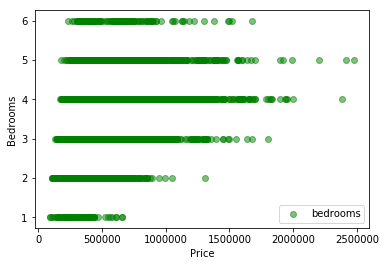

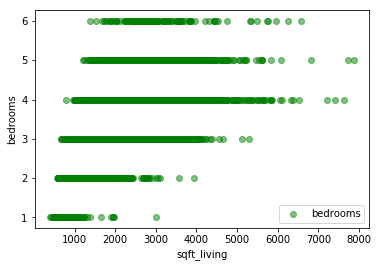

In [50]:
plt.scatter(dataset4['price'],dataset4.bedrooms,c="g", alpha=0.5,)
plt.xlabel("Price")
plt.ylabel("Bedrooms")
plt.legend(loc=4)
plt.show()
plt.scatter(dataset4['sqft_living'],dataset4.bedrooms,c="g", alpha=0.5,)
plt.xlabel("sqft_living")
plt.ylabel("bedrooms")
plt.legend(loc=4)
plt.show()

Check the relationship between bedrooms and bathrooms

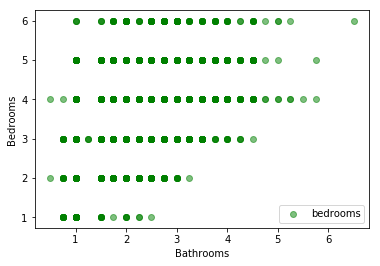

In [51]:
plt.scatter(dataset4.bathrooms,dataset4.bedrooms,c="g", alpha=0.5,)
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.legend(loc=4)
plt.show()

The figure seems acceptable, we should check about the square feet columns.

### 3.3. Check the Square feet columns

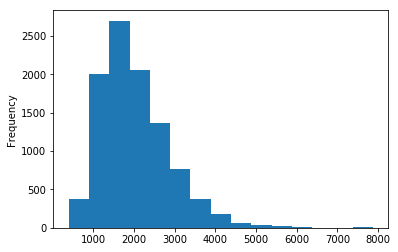

In [52]:
dataset4.sqft_living.plot(kind='hist',bins =15)

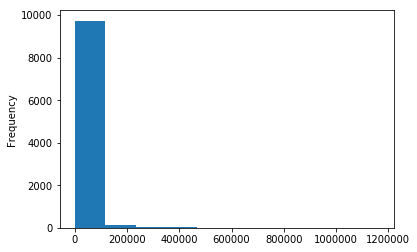

In [53]:
dataset4.sqft_lot.plot(kind='hist')

It seems there are some potential outliers in the `sqft_living`, we should check this.

In [54]:
dataset4[dataset4.sqft_living >7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price
2135,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,220.472441
3853,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,98045,47.4548,-121.764,262.803235
4464,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,306.472081
4468,1630700380,20150130T000000,1920000.0,5,5.75,7730,230868,2.0,0,0,3,12,6660,1070,2004,0,98077,47.7615,-122.084,248.382924
4726,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013,268.698061


In [55]:
group3 = dataset4.groupby('grade')
group3.sqft_living.describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
4,12.0,706.666667,274.568532,420.0,537.5,725.0,770.0,1470.0
5,107.0,985.345794,349.814050,470.0,715.0,900.0,1150.0,1810.0
6,958.0,1173.838205,386.989128,390.0,900.0,1100.0,1360.0,3240.0
7,4326.0,1679.045770,492.608699,670.0,1320.0,1610.0,1970.0,4190.0
8,2798.0,2171.154039,589.841843,760.0,1750.0,2140.0,2520.0,4750.0
9,1131.0,2849.251105,635.833486,1070.0,2424.0,2811.0,3220.0,6050.0
10,449.0,3447.113586,727.137157,1180.0,2980.0,3430.0,3880.0,6563.0
11,135.0,4276.807407,901.018267,2700.0,3585.0,4150.0,4765.0,7620.0
12,23.0,5218.260870,1083.763024,4050.0,4455.0,4870.0,5805.0,7730.0


This data seems wired, however, we should check other columns for further confirmation.
- - -
according to the grade group, these 5 records have very high grade, and large landspace area, for these have inner living space approximate 600 $m^2$ may be some luxury villa, besides, based on the high price, it should not be seemed as a outlier
- - -
We should check another potential outlier which is the landspace of a property less than the floor space of a house, this situation is contradictory to fact.

To check this contradiction, we can add another column use sqft_above divded by floor number(get a average floor space for a house).

In [56]:
dataset4['avg_floor_space'] = (dataset4['sqft_above'])/(dataset4['floors'])

In [57]:
dataset4[dataset4['avg_floor_space'] > dataset4['sqft_lot']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price,avg_floor_space
322,9828702895,20141022T000000,700000.0,4,1.75,2420,520,1.5,0,0,...,7,2420,0,1900,0,98112,47.6209,-122.302,289.256198,1613.333333


We have found one record is outlier, try to delete this record.

In [58]:
dataset4.drop([322],inplace=True)

Finally, we should drop the columns we create and 

In [59]:
dataset4.reset_index(inplace=True,drop=True)

In [60]:
dataset4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,avg_price,avg_floor_space
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,...,8,1920,0,1979,0,98027,47.5616,-122.088,325.520833,960.0
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,...,9,2060,560,1977,0,98008,47.5845,-122.115,324.427481,1030.0
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,...,7,1760,0,1964,0,98052,47.6288,-122.109,284.090909,1760.0
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,...,6,1200,0,1937,0,98117,47.6969,-122.368,312.500000,1200.0
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,...,7,1600,870,1978,0,98052,47.6936,-122.128,250.202429,1600.0


In [61]:
dataset4.drop(['avg_price','avg_floor_space'],axis=1,inplace=True)
dataset4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [62]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9941 entries, 0 to 9940
Data columns (total 19 columns):
id               9941 non-null int64
date             9941 non-null object
price            9941 non-null float64
bedrooms         9941 non-null int64
bathrooms        9941 non-null float64
sqft_living      9941 non-null int64
sqft_lot         9941 non-null int64
floors           9941 non-null float64
waterfront       9941 non-null int64
view             9941 non-null int64
condition        9941 non-null int64
grade            9941 non-null int64
sqft_above       9941 non-null int64
sqft_basement    9941 non-null int64
yr_built         9941 non-null int64
yr_renovated     9941 non-null int64
zipcode          9941 non-null int64
lat              9941 non-null float64
long             9941 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.4+ MB


## 4. Save the data

Save the data to csv file and using the default encoding

In [63]:
dataset4.to_csv('dataset4_solution.csv',encoding='utf-8',index=False)

## 5. References

[pandas](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- - -
[Reading Materials from moodle](https://moodle.vle.monash.edu/course/view.php?id=42906&section=12#12)
- - -
[numpy](https://docs.scipy.org/doc/numpy/user/quickstart.html)
- - -
[python doc.](https://docs.python.org/3/library/index.html)
- - -
[Anomaly Detection](https://en.wikipedia.org/wiki/Anomaly_detection)
- - -
[Outlier Detection Techniques](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)
- - -
[IQR](https://en.wikipedia.org/wiki/Interquartile_range)
- - -
[Box plot](https://en.wikipedia.org/wiki/Box_plot)